In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
wine_data = pd.read_csv("winequality-red.csv")

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

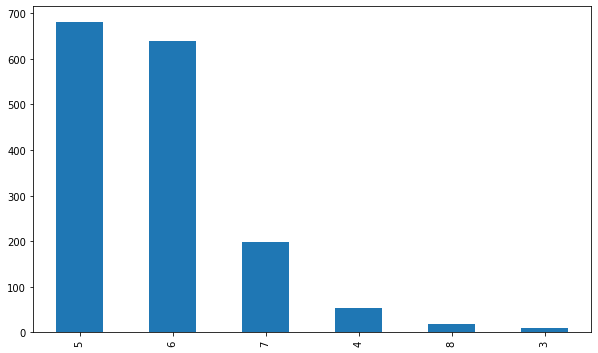

In [8]:
wine_data.quality.value_counts().plot(kind="bar", figsize=(10,6));

In [9]:
pd.crosstab(wine_data.quality,wine_data.pH)

pH,2.74,2.86,2.87,2.88,2.89,2.90,2.92,2.93,2.94,2.95,...,3.69,3.70,3.71,3.72,3.74,3.75,3.78,3.85,3.90,4.01
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,1,2,0,3,1,2,0,...,2,0,0,2,1,0,0,0,0,0
6,0,1,1,0,2,1,0,2,2,0,...,2,1,1,0,0,0,1,1,1,2
7,0,0,0,0,0,0,1,0,0,1,...,0,0,3,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine_data.alcohol.value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

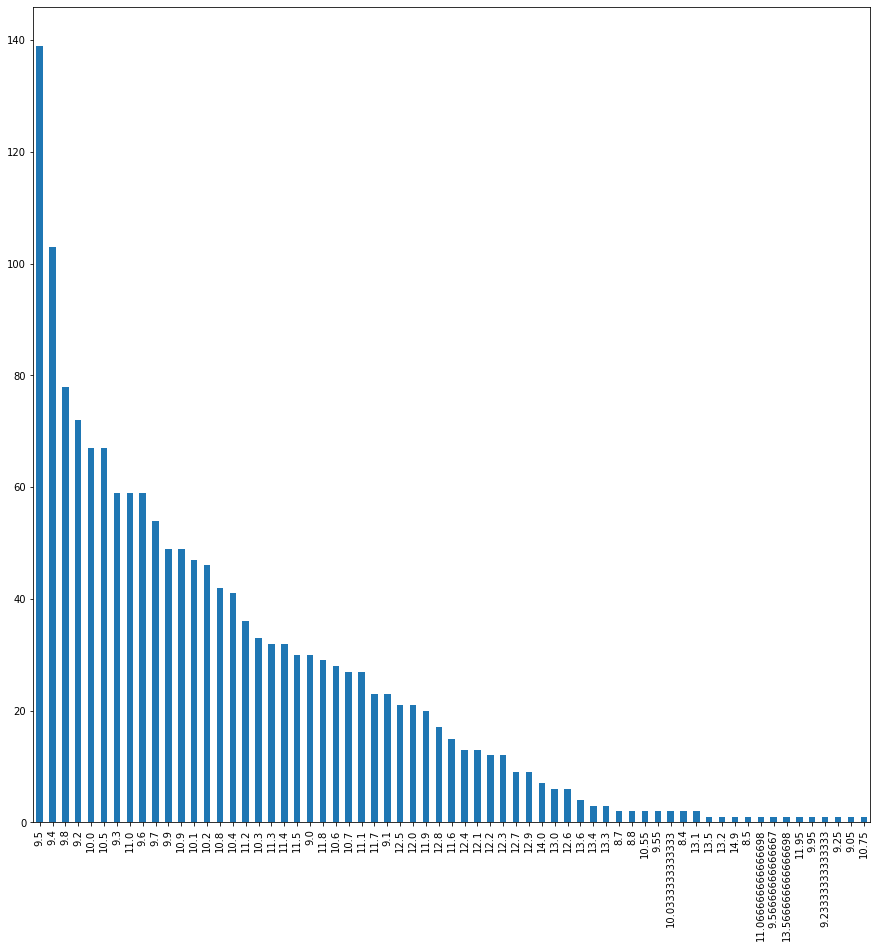

In [12]:
wine_data.alcohol.value_counts().plot(kind="bar",figsize=(15,15));

In [13]:
pd.crosstab(wine_data.quality,wine_data.alcohol)

alcohol,8.400000,8.500000,8.700000,8.800000,9.000000,9.050000,9.100000,9.200000,9.233333,9.250000,...,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.566667,13.600000,14.000000,14.900000
quality,,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,2,3,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,2,11,0,14,50,0,0,...,4,0,0,0,0,0,0,0,0,1
6,1,0,2,0,16,0,7,17,1,1,...,0,0,1,2,1,1,0,1,4,0
7,0,0,0,0,0,0,0,2,0,0,...,2,0,0,1,1,0,1,3,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,2,0


In [14]:
wine_data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

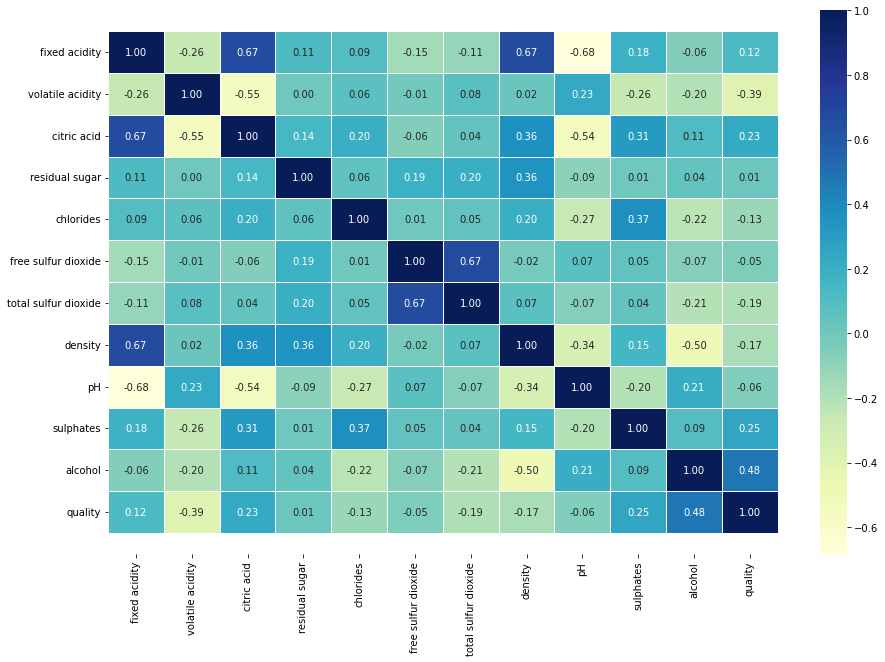

In [15]:
corr_matrix = wine_data.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
                fmt=".2f",cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [16]:
X = wine_data.drop("quality", axis=1)

y = wine_data.quality

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model=RandomForestClassifier()

model.fit(x_train,y_train)
model.score(x_test, y_test)

0.70625

In [22]:
models = {"Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()
         }

def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores={}
    
    for name,model in models.items():
        
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

In [23]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Random Forest': 0.7, 'KNN': 0.503125, 'Decision Tree': 0.609375}

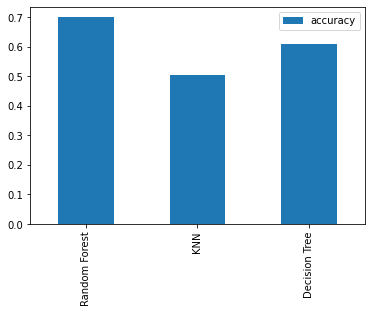

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot.bar();

In [26]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn =  KNeighborsClassifier()

for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    
    test_scores.append(knn.score(x_test, y_test))

In [27]:
train_scores

[1.0,
 0.7857701329163409,
 0.7419859265050821,
 0.6802189210320563,
 0.6544175136825645,
 0.6270523846755277,
 0.6098514464425332,
 0.6012509773260359,
 0.5989053948397185,
 0.5879593432369038,
 0.584831899921814,
 0.5832681782642689,
 0.5785770132916341,
 0.5738858483189992,
 0.5676309616888194,
 0.5762314308053167,
 0.5832681782642689,
 0.5746677091477717,
 0.5676309616888194,
 0.5598123534010946]

In [28]:
test_scores

[0.590625,
 0.55,
 0.503125,
 0.5125,
 0.503125,
 0.509375,
 0.490625,
 0.509375,
 0.525,
 0.546875,
 0.540625,
 0.528125,
 0.51875,
 0.521875,
 0.515625,
 0.546875,
 0.528125,
 0.534375,
 0.521875,
 0.51875]

Maximum KNN score on the test data 59.06%


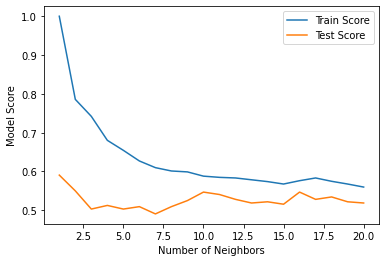

In [29]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data {max(test_scores)*100:.2f}%")